This code needs to be cleaned. But it run correctly where we have Oct 19 date.

In [ ]:
!pip install ipython-autotime
%load_ext autotime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.2 MB/s eta 0:00:00
time: 272 µs (started: 2024-12-06 07:17:04 +00:00)


In [ ]:
import gzip
import gensim
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

time: 2.14 s (started: 2024-12-06 07:17:04 +00:00)


In [ ]:
!pip install fasttext
!pip install gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296183 sha256=baa0c6d9d208cfb54d2ec0b2e08fcd672904d59e58de90228ca299a089757262
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext
time: 54.6 s (started: 2024-12-06 07:17:06 +00:00)


In [ ]:
import numpy as np

time: 303 µs (started: 2024-12-06 07:18:01 +00:00)


In [ ]:
import fasttext
import fasttext.util

time: 6.13 ms (started: 2024-12-06 07:18:01 +00:00)


The code below will probably work faster with a local version

In [ ]:
# Download the English FastText model
fasttext.util.download_model('hi', if_exists='ignore')

# Load the pre-trained model
model = fasttext.load_model('cc.hi.300.bin')


time: 16min 44s (started: 2024-12-06 07:18:01 +00:00)


In [ ]:
# Create a dictionary of word embeddings
word_embeddings = {}

# Get all words in the vocabulary
words = model.get_words()

for word in words:
    word_embeddings[word] = model.get_word_vector(word)

print(f"Total number of words: {len(word_embeddings)}")
print(f"Dimension of each word vector: {len(next(iter(word_embeddings.values())))}")

# Example: Print the first 5 words and their vector dimensions
for word in list(word_embeddings.keys())[:5]:
    print(f"{word}: {word_embeddings[word].shape}")

Total number of words: 1876665
Dimension of each word vector: 300
के: (300,)
।: (300,)
है: (300,)
,: (300,)
में: (300,)
time: 24.4 s (started: 2024-12-06 07:34:45 +00:00)


In [ ]:
# Example: Print the first 5 words and their vector dimensions
for word in list(word_embeddings.keys())[25:50]:
    print(f"{word}: {word_embeddings[word].shape}")

कि: (300,)
किया: (300,)
था: (300,)
नहीं: (300,)
ही: (300,)
यह: (300,)
इस: (300,)
कर: (300,)
हो: (300,)
गया: (300,)
तो: (300,)
}: (300,)
’: (300,)
‘: (300,)
किस: (300,)
/: (300,)
करने: (300,)
भारत: (300,)
जाता: (300,)
जो: (300,)
साथ: (300,)
अपने: (300,)
या: (300,)
थी: (300,)
द्वारा: (300,)
time: 46.5 ms (started: 2024-12-06 07:35:10 +00:00)


In [ ]:
%ls

cc.hi.300.bin  cc.hi.300.bin.gz  sample_data/
time: 104 ms (started: 2024-12-06 07:35:10 +00:00)


In [ ]:
from sklearn.preprocessing import normalize

def normalize_word_embeddings(embeddings):
    # Extract the word vectors and store them in a numpy array
    embeddings_values = np.array(list(embeddings.values()))

    # Normalize the word embeddings
    normalized_embeddings = normalize(embeddings_values)

    # Update the normalized embeddings back in the dictionary
    for i, word in enumerate(embeddings.keys()):
        embeddings[word] = normalized_embeddings[i]

    return embeddings

time: 737 ms (started: 2024-12-06 07:35:10 +00:00)


In [ ]:
# Call the function to get normalized word embeddings
normalized_embeddings = normalize_word_embeddings(word_embeddings)
#random_normalized_embeddings = normalize_word_embeddings(random_embeddings)
#print(normalized_embeddings)

time: 4.2 s (started: 2024-12-06 07:35:11 +00:00)


In [ ]:
len(normalized_embeddings)

1876665

time: 10.9 ms (started: 2024-12-06 07:35:15 +00:00)


In [ ]:
len(normalized_embeddings.keys())

1876665

time: 13.7 ms (started: 2024-12-06 07:35:15 +00:00)


In [ ]:
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 25.4 MB/s eta 0:00:00
time: 5.33 s (started: 2024-12-06 07:35:15 +00:00)


In [ ]:
import faiss
import matplotlib.pyplot as plt

time: 23.4 ms (started: 2024-12-06 07:35:21 +00:00)


In [ ]:
#Using spheres
#This code can be run.

def correlation_dimension_faiss(data, max_radius, num_radii=20,k=100):
    """
    Calculate the correlation dimension of the dataset using Faiss.

    :param data: numpy array of shape (n_samples, n_features)
    :param max_radius: maximum radius for correlation sum calculation
    :param num_radii: number of radii to use for calculation
    :return: radii, correlation_sum
    """
    n_samples, n_features = data.shape

    # Convert data to float32 (required by Faiss)
    data = data.astype(np.float32)

    # Create Faiss index
    index = faiss.IndexFlatL2(n_features)
    index.add(data)

    # Generate radii
    radii = np.logspace(-1, np.log10(max_radius), num_radii)

    # Calculate correlation sum for each radius
    correlation_sum = np.zeros(num_radii)
    for i, r in enumerate(radii):
        # Count number of neighbors within radius r for each point
        #print(index.range_search(data, r**2))
        #neighbors = index.range_search(data, r**2)  # Faiss uses squared distances
        #correlation_sum[i] = len(neighbors) / (n_samples * (n_samples - 1))

        distances, _ = index.search(data, k)

        # Count number of neighbors within radius r for each point
        count_within_radius = np.sum(distances < r**2, axis=1) - 1  # subtract 1 to exclude the point itself
        total_count = np.sum(count_within_radius)
        correlation_sum[i] = max(total_count / (n_samples * (n_samples - 1)), 1e-10)

    return radii, correlation_sum

def estimate_fractal_dimension(radii, correlation_sum):
    """
    Estimate fractal dimension from the slope of log-log plot.

    :param radii: array of radii used
    :param correlation_sum: array of correlation sums
    :return: estimated fractal dimension
    """
    log_radii = np.log(radii)
    log_correlation_sum = np.log(correlation_sum)

    print(log_radii,log_correlation_sum)
    # Linear regression to find slope
    coeffs = np.polyfit(log_radii, log_correlation_sum, deg=1)
    return coeffs[0]

time: 791 µs (started: 2024-12-06 07:35:21 +00:00)


In [ ]:
"""if __name__ == "__main__":

    n_samples, n_features = len(random_normalized_embeddings), len(list(random_normalized_embeddings.values())[0])
    embeddings_list = list(random_normalized_embeddings.values())

    # Convert to a NumPy array with dtype float32
    word_embeddings_fractal = np.array(embeddings_list, dtype=np.float32)

    # Calculate correlation dimension
    max_radius = np.sqrt(n_features)  # Maximum possible distance in the feature space
    radii, correlation_sum = correlation_dimension_faiss(word_embeddings_fractal, max_radius)

    # Estimate fractal dimension
    fractal_dim = estimate_fractal_dimension(radii, correlation_sum)

    print(f"Estimated fractal dimension: {fractal_dim:.2f}")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.loglog(radii, correlation_sum, 'bo-')
    plt.xlabel('Radius (r)')
    plt.ylabel('Correlation Sum C(r)')
    plt.title('Correlation Dimension Analysis')
    plt.grid(True)
    plt.show()

    #Word2vec google news - hugging face 3M words embeddings,Russian National corpus,, fasttext embeddings.
    #Complete works of shakesphere, word to word path connection, Projection wise fractal dimension calculation
    #Understand brazillians code."""
    #we don't randomize in this experiment

'if __name__ == "__main__":\n\n    n_samples, n_features = len(random_normalized_embeddings), len(list(random_normalized_embeddings.values())[0])\n    embeddings_list = list(random_normalized_embeddings.values())\n\n    # Convert to a NumPy array with dtype float32\n    word_embeddings_fractal = np.array(embeddings_list, dtype=np.float32)\n\n    # Calculate correlation dimension\n    max_radius = np.sqrt(n_features)  # Maximum possible distance in the feature space\n    radii, correlation_sum = correlation_dimension_faiss(word_embeddings_fractal, max_radius)\n\n    # Estimate fractal dimension\n    fractal_dim = estimate_fractal_dimension(radii, correlation_sum)\n\n    print(f"Estimated fractal dimension: {fractal_dim:.2f}")\n\n    # Plot results\n    plt.figure(figsize=(10, 6))\n    plt.loglog(radii, correlation_sum, \'bo-\')\n    plt.xlabel(\'Radius (r)\')\n    plt.ylabel(\'Correlation Sum C(r)\')\n    plt.title(\'Correlation Dimension Analysis\')\n    plt.grid(True)\n    plt.show()\

time: 2.21 ms (started: 2024-12-06 07:35:21 +00:00)




```
# This is formatted as code
**KeyboardInterrupt**                         Traceback (most recent call last)
<ipython-input-26-e11b30dddfd9> in <cell line: 1>()
      9     # Calculate correlation dimension
     10     max_radius = np.sqrt(n_features)  # Maximum possible distance in the feature space
---> 11     radii, correlation_sum = correlation_dimension_faiss(word_embeddings_fractal, max_radius)
     12
     13     # Estimate fractal dimension

2 frames
/usr/local/lib/python3.10/dist-packages/faiss/swigfaiss.py in search(self, n, x, k, distances, labels)
   2144
   2145     def search(self, n, x, k, distances, labels):
-> 2146         return _swigfaiss.IndexFlat_search(self, n, x, k, distances, labels)
   2147
   2148     def range_search(self, n, x, radius, result):

**KeyboardInterrupt**:
```



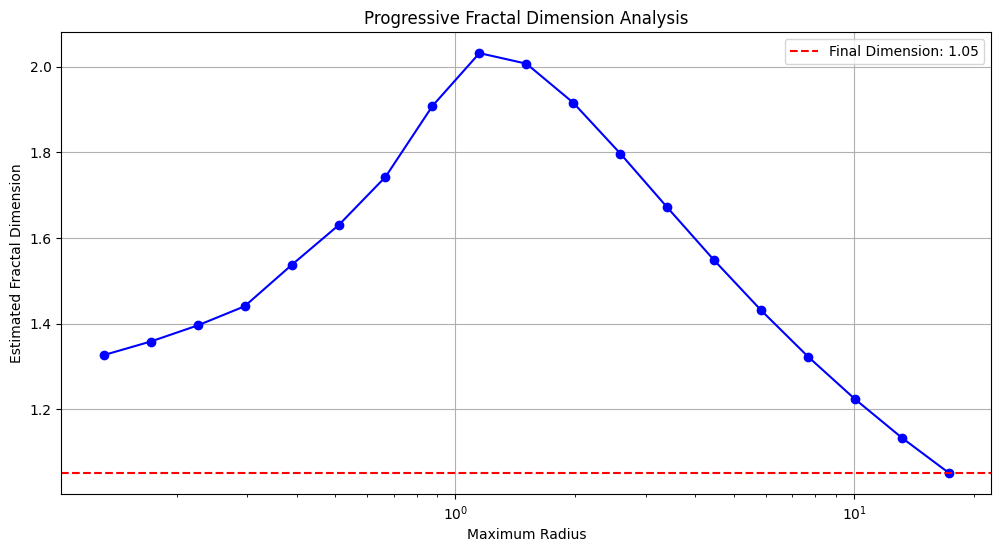

Final estimated fractal dimension: 1.05
Up to radius 0.1312: Estimated dimension = 1.33
Up to radius 0.1720: Estimated dimension = 1.36
Up to radius 0.2257: Estimated dimension = 1.40
Up to radius 0.2960: Estimated dimension = 1.44
Up to radius 0.3882: Estimated dimension = 1.54
Up to radius 0.5092: Estimated dimension = 1.63
Up to radius 0.6679: Estimated dimension = 1.74
Up to radius 0.8761: Estimated dimension = 1.91
Up to radius 1.1491: Estimated dimension = 2.03
Up to radius 1.5073: Estimated dimension = 2.01
Up to radius 1.9770: Estimated dimension = 1.92
Up to radius 2.5932: Estimated dimension = 1.80
Up to radius 3.4013: Estimated dimension = 1.67
Up to radius 4.4613: Estimated dimension = 1.55
Up to radius 5.8517: Estimated dimension = 1.43
Up to radius 7.6754: Estimated dimension = 1.32
Up to radius 10.0675: Estimated dimension = 1.22
Up to radius 13.2051: Estimated dimension = 1.13
Up to radius 17.3205: Estimated dimension = 1.05
time: 9h 10min 21s (started: 2024-12-06 07:35

In [ ]:
#Track progressive fractal dimension value, that is if I stop at 10^0 what is the fractal dimension before that?

def correlation_dimension_faiss(data, max_radius, num_radii=20, k=100):
    n_samples, n_features = data.shape
    data = data.astype(np.float32)

    index = faiss.IndexFlatL2(n_features)
    index.add(data)

    radii = np.logspace(-1, np.log10(max_radius), num_radii)
    correlation_sum = np.zeros(num_radii)

    distances, _ = index.search(data, k)

    for i, r in enumerate(radii):
        count_within_radius = np.sum(distances < r**2, axis=1) - 1
        total_count = np.sum(count_within_radius)
        correlation_sum[i] = max(total_count / (n_samples * (n_samples - 1)), 1e-10)

    return radii, correlation_sum

def estimate_fractal_dimension(radii, correlation_sum):
    valid_indices = correlation_sum > 0
    log_radii = np.log(radii[valid_indices])
    log_correlation_sum = np.log(correlation_sum[valid_indices])

    if len(log_radii) < 2:
        return np.nan

    coeffs = np.polyfit(log_radii, log_correlation_sum, deg=1)
    return coeffs[0]

def progressive_fractal_dimension(data, max_radius, num_radii=20, k=100):
    radii, correlation_sum = correlation_dimension_faiss(data, max_radius, num_radii, k)
    progressive_dimensions = []

    for i in range(2, len(radii) + 1):
        dim = estimate_fractal_dimension(radii[:i], correlation_sum[:i])
        progressive_dimensions.append(dim)

    return radii[1:], progressive_dimensions

# Example usage
if __name__ == "__main__":



    n_samples, n_features = len(normalized_embeddings), len(list(normalized_embeddings.values())[0])
    embeddings_list = list(normalized_embeddings.values())

    embeddings_list = embeddings_list[0:] #embeddings_list[0:100000]

    word_embeddings_fractal = np.array(embeddings_list, dtype=np.float32)

    max_radius = np.sqrt(n_features)
    radii, progressive_dims = progressive_fractal_dimension(word_embeddings_fractal, max_radius)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(radii, progressive_dims, 'bo-')
    plt.xscale('log')
    plt.xlabel('Maximum Radius')
    plt.ylabel('Estimated Fractal Dimension')
    plt.title('Progressive Fractal Dimension Analysis')
    plt.grid(True)

    # Add final estimated dimension to the plot
    final_dim = progressive_dims[-1]
    plt.axhline(y=final_dim, color='r', linestyle='--', label=f'Final Dimension: {final_dim:.2f}')
    plt.legend()

    plt.show()

    print(f"Final estimated fractal dimension: {final_dim:.2f}")

    # Print progressive dimensions
    for i, (r, dim) in enumerate(zip(radii, progressive_dims)):
        print(f"Up to radius {r:.4f}: Estimated dimension = {dim:.2f}")

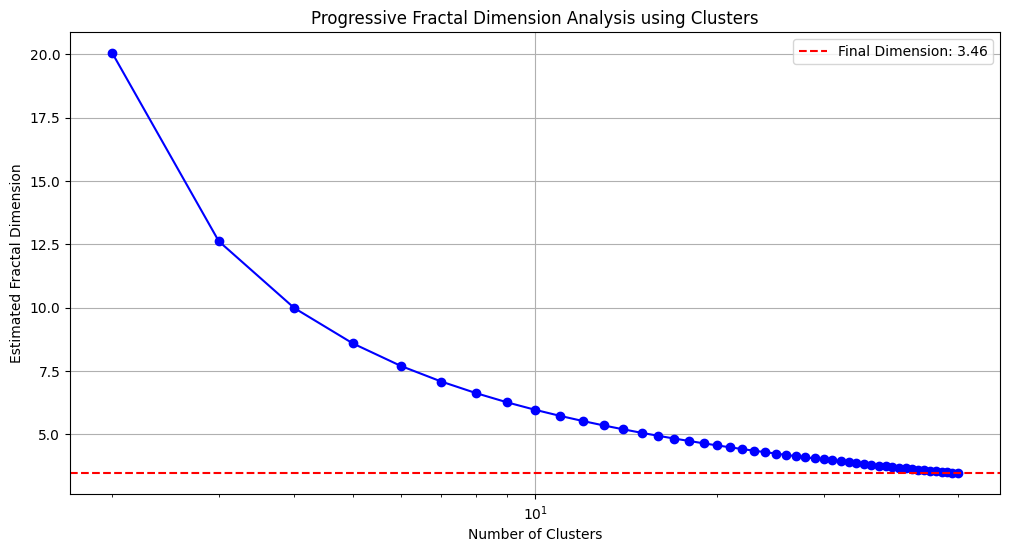


Number of clusters: 2
Cluster sizes: [47667 52333]
Cluster fractal dimensions: [15.54070321 15.67543334]
Total fractal dimension: 20.0454

Number of clusters: 3
Cluster sizes: [39326 16457 44217]
Cluster fractal dimensions: [9.63000438 8.83706317 9.73670577]
Total fractal dimension: 12.6188

Number of clusters: 4
Cluster sizes: [15099 33593 17050 34258]
Cluster fractal dimensions: [6.94108269 7.51793651 7.02874206 7.53207665]
Total fractal dimension: 9.9795

Number of clusters: 5
Cluster sizes: [14252 17579 36341 15033 16795]
Cluster fractal dimensions: [5.94285275 6.07321364 6.5244529  5.9760013  6.04486599]
Total fractal dimension: 8.5826

Number of clusters: 6
Cluster sizes: [11946 22986 14839 13759 16834 19636]
Cluster fractal dimensions: [5.23962727 5.60490445 5.36066045 5.31848644 5.43106153 5.51699046]
Total fractal dimension: 7.6962

Number of clusters: 7
Cluster sizes: [15811 16882 21237 14213 14043  8000  9814]
Cluster fractal dimensions: [4.96860617 5.00228813 5.12022625 4.

In [ ]:
#import faiss
#import matplotlib.pyplot as plt

def cluster_fractal_analysis(data, max_clusters, min_clusters=2):
    #1st row - cluster_sizes
    #2nd row - fractal dimension of each box/cluster
    #3rd row - average.
    n_samples, n_features = data.shape
    data = data.astype(np.float32)

    results = []

    for k in range(min_clusters, max_clusters + 1):
        kmeans = faiss.Kmeans(d=n_features, k=k, niter=300, verbose=False)
        kmeans.train(data)
        _, labels = kmeans.index.search(data, 1)

        # Calculate cluster sizes
        unique, counts = np.unique(labels, return_counts=True)
        cluster_sizes = counts[counts > 0]

        # Calculate fractal dimension for each cluster
        cluster_fractal_dims = np.log(cluster_sizes) / np.log(k)

        # Calculate total fractal dimension
        log_n = np.log(k)
        log_m = np.log(np.sum(cluster_sizes * np.log(cluster_sizes)))
        total_dimension = log_m / log_n if log_n != 0 else np.nan

        # Store results
        results.append({
            'num_clusters': k,
            'cluster_sizes': cluster_sizes,
            'cluster_fractal_dims': cluster_fractal_dims,
            'total_fractal_dim': total_dimension
        })

    return results

def cluster_fractal_dimension(data, max_clusters, min_clusters=2):
    n_samples, n_features = data.shape
    data = data.astype(np.float32)

    dimensions = []
    cluster_counts = range(min_clusters, max_clusters + 1)

    for k in cluster_counts:
        kmeans = faiss.Kmeans(d=n_features, k=k, niter=300, verbose=False)
        kmeans.train(data)
        _, labels = kmeans.index.search(data, 1)

        # Calculate cluster sizes
        unique, counts = np.unique(labels, return_counts=True)
        cluster_sizes = counts[counts > 0]

        # Calculate fractal dimension using box-counting method
        log_n = np.log(k)
        log_m = np.log(np.sum(cluster_sizes * np.log(cluster_sizes)))
        dimension = log_m / log_n if log_n != 0 else np.nan

        dimensions.append(dimension)

    return cluster_counts, dimensions

def progressive_fractal_dimension(data, max_clusters, min_clusters=2):
    cluster_counts, dimensions = cluster_fractal_dimension(data, max_clusters, min_clusters)
    return cluster_counts, dimensions

# Example usage
if __name__ == "__main__":
    # Assuming random_normalized_embeddings is your dictionary of word embeddings
    n_samples = len(normalized_embeddings)
    n_features = len(list(normalized_embeddings.values())[0])
    embeddings_list = list(normalized_embeddings.values())

    word_embeddings_fractal = np.array(embeddings_list, dtype=np.float32)

    word_embeddings_fractal = word_embeddings_fractal[0:100000]

    max_clusters = min(50, n_samples // 2)  # Adjust based on your data size
    cluster_counts, progressive_dims = progressive_fractal_dimension(word_embeddings_fractal, max_clusters)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(cluster_counts, progressive_dims, 'bo-')
    plt.xscale('log')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Estimated Fractal Dimension')
    plt.title('Progressive Fractal Dimension Analysis using Clusters')
    plt.grid(True)

    # Add final estimated dimension to the plot
    final_dim = progressive_dims[-1]
    plt.axhline(y=final_dim, color='r', linestyle='--', label=f'Final Dimension: {final_dim:.2f}')
    plt.legend()

    plt.show()


    results = cluster_fractal_analysis(word_embeddings_fractal, max_clusters)

    # Print results
    for result in results:
        print(f"\nNumber of clusters: {result['num_clusters']}")
        print("Cluster sizes:", result['cluster_sizes'])
        print("Cluster fractal dimensions:", result['cluster_fractal_dims'])
        print(f"Total fractal dimension: {result['total_fractal_dim']:.4f}")